In [18]:
cd /home/blansdel/projects/schwarz/decoder

/home/blansdel/projects/schwarz/decoder


In [19]:
import os 
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import pickle

In [20]:
#Load the pickle files
import pickle 
with open('day6results_may19.pkl', 'rb') as f:
    day6results = pickle.load(f)

In [21]:
certain_thresh = 0.999
certainnot_thresh = 0.001

TEST_IDX = 1
TRAIN_IDX = 2 
VAL_IDX = 3

Text(0.5, 0.98, 'Day 6')

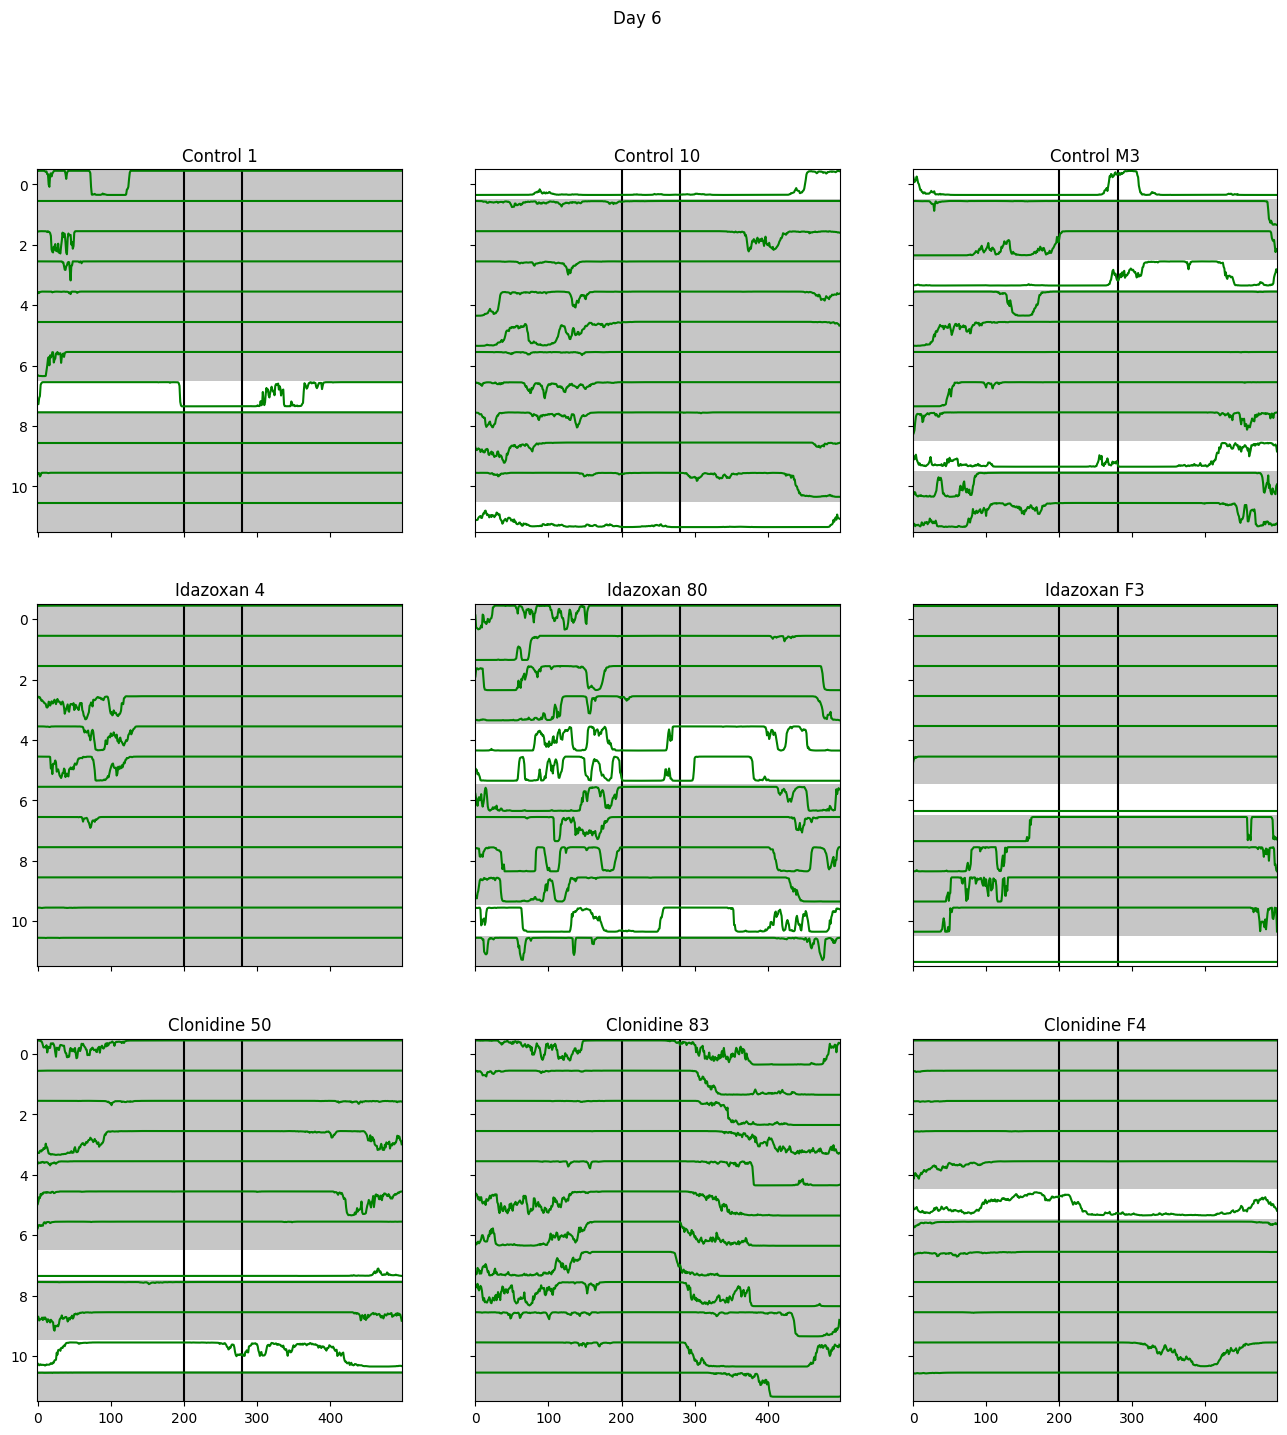

In [22]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d9 = {}
day = 'Day 6'
res = day6results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][VAL_IDX][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > 0.99).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < 0.01).astype(int)
    certain_counts_d9[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


### Summarize results

In [14]:
def summarize_results(results_d7, results_d9, key):
    results = pd.concat([results_d7, results_d9])
    results['Session'] = results['Session_trial'].str.split('_').str[0]
    results['Pred_reward_trial'] = (results['Prop_pred_reward_trial'] > 0.5).astype(float)    
    df = results[['treatment', 'animal', 'val_accuracy', 'test_accuracy']].drop_duplicates()
    df['start_frame'] = key[0]
    df['end_frame'] = key[1]
    return df[['start_frame', 'end_frame', 'val_accuracy', 'test_accuracy']].mean(), df

In [15]:
list(day6results.keys())[0]

("Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),\n                ('lda', LinearDiscriminantAnalysis())])",
 (201, 240))

In [16]:
mean_results, df_results = summarize_results(day6results[list(day6results.keys())[0]][0], day6results[list(day6results.keys())[0]][0], (201, 240))
df_results

,treatment,animal,val_accuracy,test_accuracy,start_frame,end_frame
0,Control,1,0.873846,0.591880,201,240
0,Control,10,0.748718,0.467949,201,240
0,Control,M3,0.720000,0.619658,201,240
0,Idazoxan,4,0.842051,0.205128,201,240
0,Idazoxan,80,0.754872,0.777778,201,240
0,Idazoxan,F3,0.860000,0.465812,201,240
0,Clonidine,50,0.803077,0.363248,201,240
0,Clonidine,83,0.687692,0.318376,201,240
0,Clonidine,F4,0.753333,0.250000,201,240


## Count number of switches between certain predictions

Text(0.5, 0.98, 'Day 6')

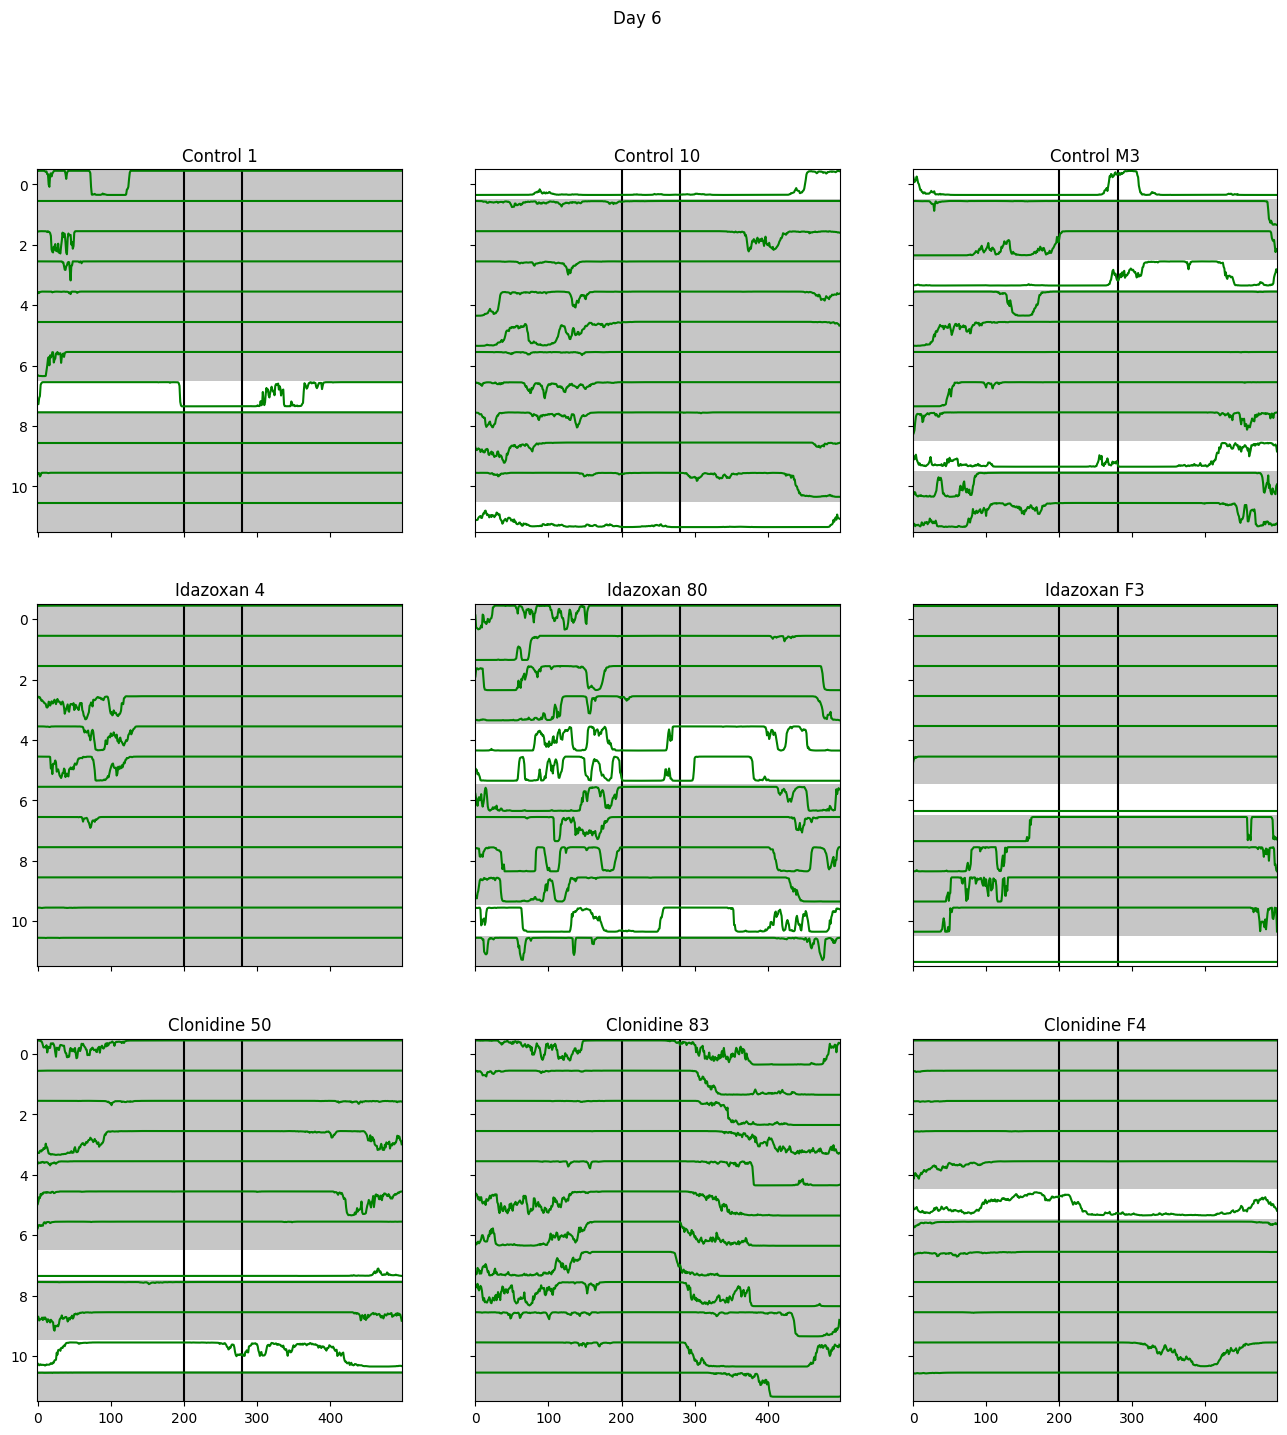

In [24]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d6 = {}
day = 'Day 6'
res = day6results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][VAL_IDX][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > 0.99).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < 0.01).astype(int)
    certain_counts_d6[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


In [25]:
from collections import defaultdict

In [28]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d6:
    switches_by_groups[k[0]] += list(certain_counts_d6[k])
from scipy.stats import ranksums
print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=1.3345813223389849, pvalue=0.18201341441813823)
Control v clonidine RanksumsResult(statistic=1.4978845221188606, pvalue=0.1341632557008621)
Clonidine v idazoxan RanksumsResult(statistic=0.6701062335794903, pvalue=0.502790071426495)


In [29]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 5.5
Idazoxan 3.5
Clonidine 3.0
